# Karttest

In [1]:
sf::sf_use_s2(FALSE)

suppressPackageStartupMessages({ 
library(tidyverse)
library(readxl)
library(klassR)
library(sf)
library(leaflet)
        })

Spherical geometry (s2) switched off

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [2]:
tjeneste <- "TSB"

aargang <- 2022
aargang_t1 <- aargang-1

In [3]:
arbeidsmappe <- "/ssb/stamme01/fylkhels/speshelse/felles/"

arbeidsmappe_kart <- paste0(arbeidsmappe, "kart/", aargang, "/")
arbeidsmappe_kart_t1 <- paste0(arbeidsmappe, "kart/", aargang_t1, "/")

arbeidsmappe_opptak <- paste0(arbeidsmappe, "opptaksomrader/", aargang, "/")
arbeidsmappe_opptak_t1 <- paste0(arbeidsmappe, "opptaksomrader/", aargang_t1, "/")

## RHF

In [4]:
opptaksomrade_RHF_filsti <- paste0(arbeidsmappe_opptak, "opptaksomrader_", tjeneste, "_RHF_", aargang, ".parquet")
opptaksomrade_RHF_t1_filsti <- paste0(arbeidsmappe_opptak_t1, "opptaksomrader_", tjeneste, "_RHF_", aargang_t1, ".parquet")

# # Lese inn filen som parquet med sfarrow
opptaksomrade_RHF <- sfarrow::st_read_parquet(opptaksomrade_RHF_filsti)
opptaksomrade_RHF_t1 <- sfarrow::st_read_parquet(opptaksomrade_RHF_t1_filsti)

colnames(opptaksomrade_RHF)

[1] "NAVN_RHF" "PERSONER" "geometry"

In [5]:
unique(opptaksomrade_RHF_t1$NAVN_RHF)

[1] "HELSE MIDT-NORGE RHF" "HELSE NORD RHF"       "HELSE SØR-ØST RHF"   
[4] "HELSE VEST RHF"

### Helse Vest

In [6]:
sf::st_crs(opptaksomrade_RHF)==sf::st_crs(opptaksomrade_RHF_t1)

[1] TRUE

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


 [m^2]

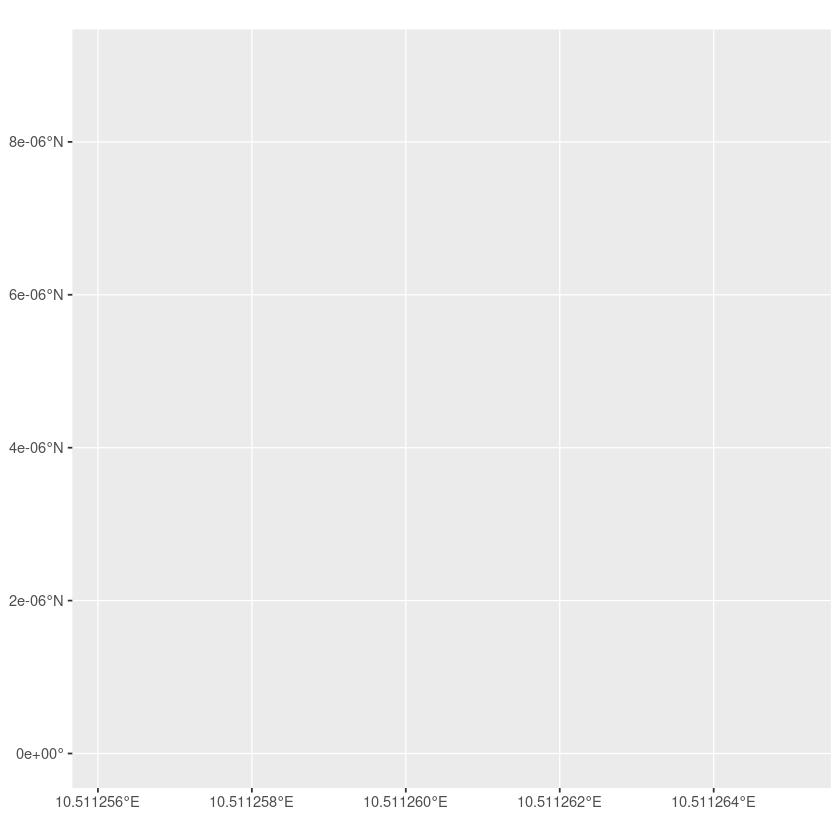

In [7]:
opptaksomrade_RHF_1 <- opptaksomrade_RHF %>%
dplyr::filter(NAVN_RHF == "HELSE VEST RHF")

opptaksomrade_RHF_t1_1 <- opptaksomrade_RHF_t1 %>%
dplyr::filter(NAVN_RHF == "HELSE VEST RHF")

HELSE_VEST <- sf::st_difference(opptaksomrade_RHF_1, opptaksomrade_RHF_t1_1)

ggplot() + 
geom_sf(data = HELSE_VEST)

sf::st_area(HELSE_VEST)

### Helse Nord RHF

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


 [m^2]

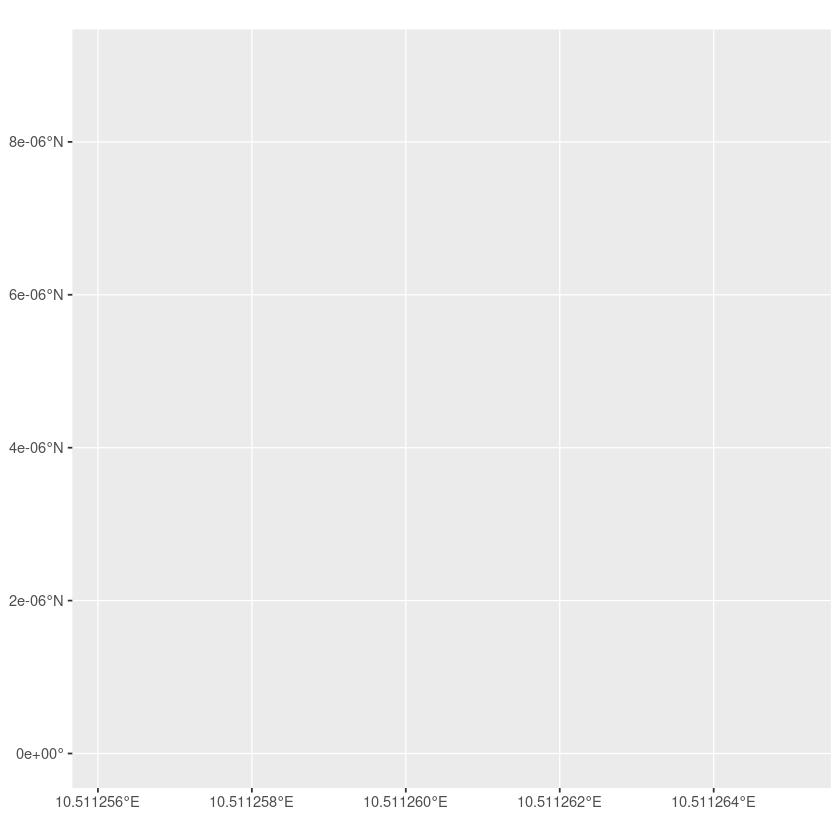

In [8]:
opptaksomrade_RHF_1 <- opptaksomrade_RHF %>%
dplyr::filter(NAVN_RHF == "HELSE NORD RHF")

opptaksomrade_RHF_t1_1 <- opptaksomrade_RHF_t1 %>%
dplyr::filter(NAVN_RHF == "HELSE NORD RHF")

HELSE_NORD <- sf::st_difference(opptaksomrade_RHF_1, opptaksomrade_RHF_t1_1)

ggplot() + 
geom_sf(data = HELSE_NORD)

sf::st_area(HELSE_NORD)

### Helse Sør-Øst

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


[1] 1

95899.4 [m^2]

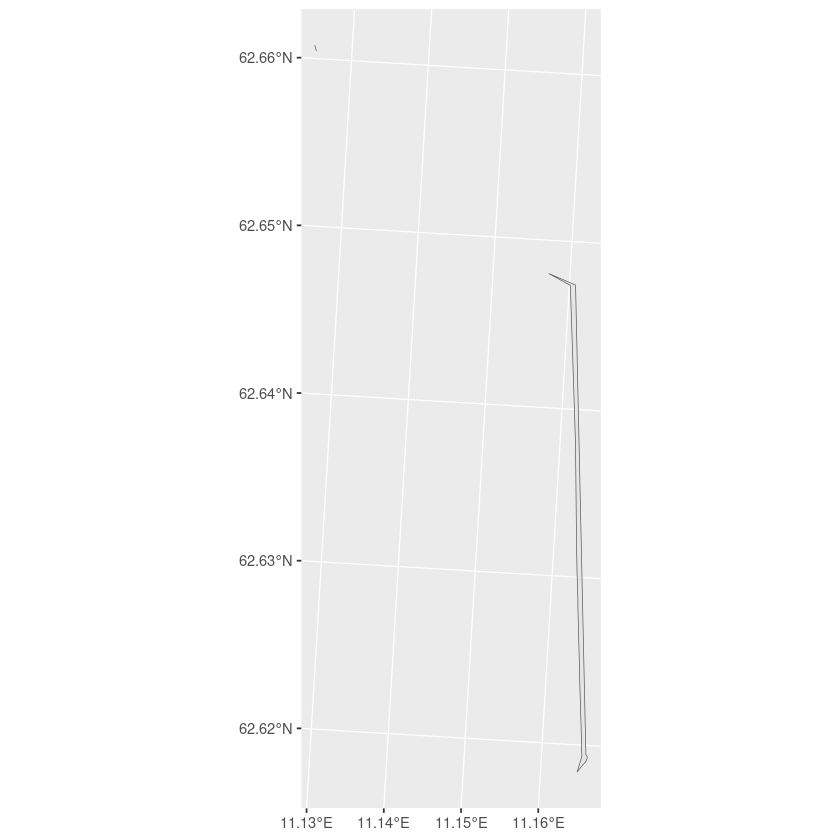

In [9]:
opptaksomrade_RHF_1 <- opptaksomrade_RHF %>%
dplyr::filter(NAVN_RHF == "HELSE SØR-ØST RHF")

opptaksomrade_RHF_t1_1 <- opptaksomrade_RHF_t1 %>%
dplyr::filter(NAVN_RHF == "HELSE SØR-ØST RHF")

HELSE_SOR_OST <- sf::st_difference(opptaksomrade_RHF_1, opptaksomrade_RHF_t1_1)

ggplot() + 
geom_sf(data = HELSE_SOR_OST)

nrow(HELSE_SOR_OST)
sf::st_area(HELSE_SOR_OST)

### Helse Midt-Norge

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


[1] 1

178438.4 [m^2]

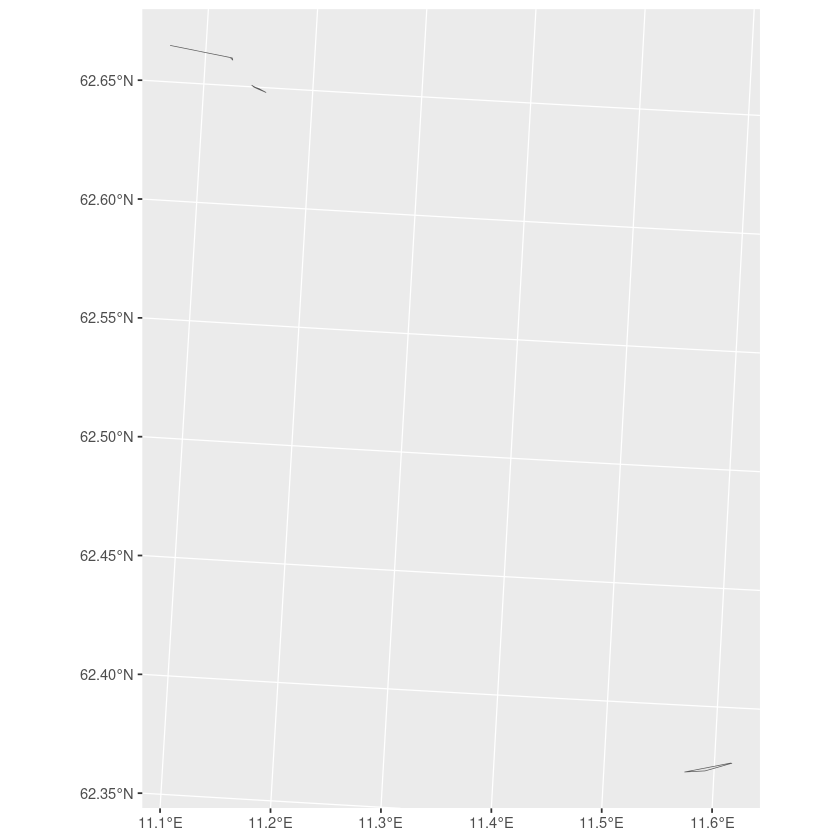

In [10]:
opptaksomrade_RHF_1 <- opptaksomrade_RHF %>%
dplyr::filter(NAVN_RHF == "HELSE MIDT-NORGE RHF")

opptaksomrade_RHF_t1_1 <- opptaksomrade_RHF_t1 %>%
dplyr::filter(NAVN_RHF == "HELSE MIDT-NORGE RHF")

HELSE_MIDT <- sf::st_difference(opptaksomrade_RHF_1, opptaksomrade_RHF_t1_1)

ggplot() + 
geom_sf(data = HELSE_MIDT)

nrow(HELSE_MIDT)
sf::st_area(HELSE_MIDT)

## HF

In [11]:
opptaksomrade_HF_filsti <- paste0(arbeidsmappe_opptak, "opptaksomrader_SOM_HF_", aargang, ".parquet")
opptaksomrade_HF_t1_filsti <- paste0(arbeidsmappe_opptak_t1, "opptaksomrader_SOM_HF_", aargang_t1, ".parquet")

# # Lese inn filen som parquet med sfarrow
opptaksomrade_HF <- sfarrow::st_read_parquet(opptaksomrade_HF_filsti)
opptaksomrade_HF_t1 <- sfarrow::st_read_parquet(opptaksomrade_HF_t1_filsti)

In [12]:
unique(opptaksomrade_HF_t1$NAVN_HF)

[1] "AKERSHUS UNIVERSITETSSYKEHUS HF"     "DIAKONHJEMMET SYKEHUS AS"           
 [3] "FINNMARKSSYKEHUSET HF"               "HELGELANDSSYKEHUSET HF"             
 [5] "HELSE BERGEN HF"                     "HELSE FONNA HF"                     
 [7] "HELSE FØRDE HF"                      "HELSE MØRE OG ROMSDAL HF"           
 [9] "HELSE NORD-TRØNDELAG HF"             "HELSE STAVANGER HF"                 
[11] "LOVISENBERG DIAKONALE SYKEHUS AS"    "NORDLANDSSYKEHUSET HF"              
[13] "OSLO UNIVERSITETSSYKEHUS HF"         "SØRLANDET SYKEHUS HF"               
[15] "ST OLAVS HOSPITAL HF"                "SYKEHUSET I VESTFOLD HF"            
[17] "SYKEHUSET INNLANDET HF"              "SYKEHUSET ØSTFOLD HF"               
[19] "SYKEHUSET TELEMARK HF"               "UNIVERSITETSSYKEHUSET NORD-NORGE HF"
[21] "VESTRE VIKEN HF"

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


[1] 0

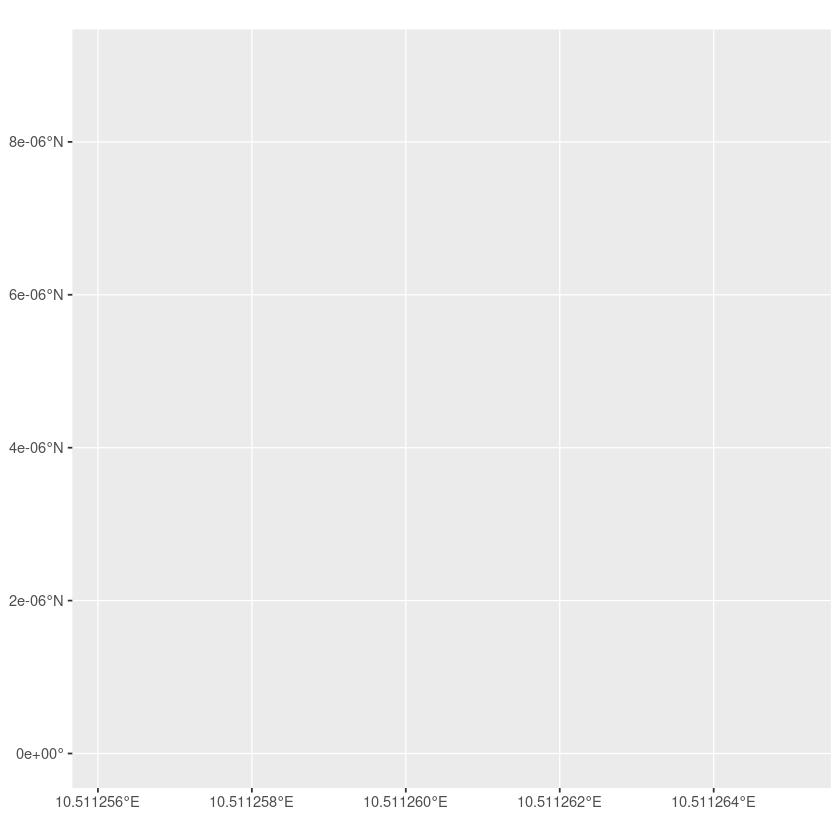

In [13]:
HF <- "UNIVERSITETSSYKEHUSET NORD-NORGE HF"

opptaksomrade_HF_1 <- opptaksomrade_HF %>%
dplyr::filter(NAVN_HF == HF)

opptaksomrade_HF_t1_1 <- opptaksomrade_HF_t1 %>%
dplyr::filter(NAVN_HF == HF)

HF <- sf::st_difference(opptaksomrade_HF_1, opptaksomrade_HF_t1_1)

ggplot() + 
geom_sf(data = HF)

# HF$area <- sf::st_area(HF)

# HF %>%
# data.frame()

nrow(HF)

## Lokasjon

In [14]:
if (tjeneste == "SOM") {
opptaksomrade_lokasjon_filsti <- paste0(arbeidsmappe_opptak, "opptaksomrader_SOM_lokasjon_", aargang, ".parquet")
opptaksomrade_lokasjon_t1_filsti <- paste0(arbeidsmappe_opptak_t1, "opptaksomrader_SOM_lokasjon_", aargang_t1, ".parquet")

# # Lese inn filen som parquet med sfarrow
opptaksomrade_lokasjon <- sfarrow::st_read_parquet(opptaksomrade_lokasjon_filsti)
opptaksomrade_lokasjon_t1 <- sfarrow::st_read_parquet(opptaksomrade_lokasjon_t1_filsti)
    
unique(opptaksomrade_lokasjon$OPPTAK)
    }

In [15]:
if (tjeneste == "SOM") {

lokasjon <- "Narvik"

opptaksomrade_lokasjon_1 <- opptaksomrade_lokasjon %>%
dplyr::filter(OPPTAK == lokasjon)

opptaksomrade_lokasjon_t1_1 <- opptaksomrade_lokasjon_t1 %>%
dplyr::filter(OPPTAK == lokasjon)

lokasjon <- sf::st_difference(opptaksomrade_lokasjon_1, opptaksomrade_lokasjon_t1_1)

ggplot() + 
geom_sf(data = lokasjon)

sf::st_area(lokasjon)
    }

In [16]:
if (tjeneste == "SOM") {

lokasjon_2 <- "Bodø"

opptaksomrade_lokasjon_1 <- opptaksomrade_lokasjon %>%
dplyr::filter(OPPTAK == lokasjon_2)

opptaksomrade_lokasjon_t1_1 <- opptaksomrade_lokasjon_t1 %>%
dplyr::filter(OPPTAK == lokasjon_2)

lokasjon_2 <- sf::st_difference(opptaksomrade_lokasjon_1, opptaksomrade_lokasjon_t1_1)

ggplot() + 
geom_sf(data = lokasjon_2)

sf::st_area(lokasjon_2)
    }

## Laster inn bereg

In [17]:
# bereg_filsti <- paste0("/ssb/stamme04/bereg/person/wk24/bosatte_koorfil_g", aargang, "m01d01eslep.sas7bdat")

# bosatte_koorfil <- haven::read_sas(bereg_filsti)

# bosatte_koorfil <- bosatte_koorfil %>%
#   dplyr::mutate(GRUNNKRETSNUMMER = paste0(KOMMNR, gkrets),
#                 XY = paste0(X_KOORDINAT, ", ", Y_KOORDINAT)) %>%
#   dplyr::mutate(ID = paste0(KOMMNR, "-",  # Lager ID
#                             GATENR_GAARDSNR, "-",
#                             HUSNR_BRUKSNR, "-",
#                             BOKSTAV_FESTENR, "-",
#                             XY)) %>%
#   dplyr::filter(!is.na(X_KOORDINAT), # Sletter personer uten adressekoordinater
#                 !is.na(Y_KOORDINAT))

In [18]:
# opptaksomrader_KLASS <- klassR::GetKlass(629, output_style = "wide", date = c(paste0(aargang, "-01-01"))) %>%
# dplyr::rename(GRUNNKRETSNUMMER = code4, 
#              GRUNNKRETS_NAVN = name4, 
#              OPPTAK_NUMMER = code3, 
#              OPPTAK = name3, 
#              ORGNR_HF = code2, 
#              NAVN_HF = name2, 
#              ORGNR_RHF = code1, 
#              NAVN_RHF = name1)

# nrow(opptaksomrader_KLASS)

In [19]:
# opptaksomrader_KLASS_2 <- opptaksomrader_KLASS %>%
# dplyr::filter(OPPTAK %in% c("Bodø", "Narvik"))

In [20]:
# bosatte_koorfil_2 <- bosatte_koorfil %>%
# dplyr::filter(GRUNNKRETSNUMMER %in% unique(opptaksomrader_KLASS_2$GRUNNKRETSNUMMER))

In [21]:
# class(bosatte_koorfil_2)
# nrow(bosatte_koorfil_2)

In [22]:
# bosatte_koorfil_2 <- bosatte_koorfil_2 %>%
#   dplyr::rename(X = X_KOORDINAT, 
#                 Y = Y_KOORDINAT) %>%
#   dplyr::mutate(x = as.numeric(as.character(X)),
#                 Y = as.numeric(as.character(Y))) %>%
#   sf::st_as_sf(coords = c("Y", "X"), crs = 25833) %>%
# dplyr::select(-x)

In [23]:
# class(bosatte_koorfil_2)
# class(lokasjon_2)

In [24]:
# colnames(bosatte_koorfil_2)

In [25]:
# lokasjon_3 <- c("Narvik", "Bodø")

# opptaksomrade_lokasjon_3 <- opptaksomrade_lokasjon %>%
# dplyr::filter(OPPTAK %in% lokasjon_3)

In [26]:
# test <- sf::st_filter(bosatte_koorfil_2, lokasjon_2) # opptaksomrade_lokasjon_3
# nrow(test)

In [27]:
# ggplot() + 
# geom_sf(data = opptaksomrade_lokasjon_3) + # lokasjon_2
# geom_sf(data = bosatte_koorfil_2) # test